In [14]:
from init_mnist import init, load
import numpy as np

In [15]:
# in case that dataset is missing or pickle is broken uncomment this
# init()

x_train, y_train, x_test, y_test = load()

# take first 1000 samples
x_train = x_train
y_train = y_train

# transform labels from [2] to [0,0,1,0,0,0,0,0,0,0]
OUT_CLASSES = 10

transformed_y_train = []

for y_label in y_train:
    zero = np.zeros((OUT_CLASSES,))
    zero[y_label] = 1
    transformed_y_train.append(zero)

y_train = transformed_y_train

transformed_y_test = []

for y_label in y_test:
    zero = np.zeros((OUT_CLASSES,))
    zero[y_label] = 1
    transformed_y_test.append(zero)

y_test = transformed_y_test

# normalize input, avoid divergence
x_train = x_train / 255
x_test = x_test / 255

In [16]:
def predict(input_data, weights):
    return np.dot(input_data, weights)

# calculate accuracy
def accuracy(x_train, y_train, weights):
    match = 0
    for input_, label in zip(x_train, y_train):
        if np.argmax(predict(input_, weights)) == np.argmax(label):
            match += 1

    return match / len(x_train)

In [17]:
# random weights from range -1 to 1
init_weights = 2 * np.random.rand(x_train.shape[1], 10) - 1

predict(x_train[0], init_weights)

array([ -1.26875171,  -6.75527365,  -0.90408115,   5.98261896,
        -5.10040067,   1.03973048,   0.84053591,  -6.34240481,
         8.83118332, -18.03176909])

In [20]:
def train(train_data, train_labels, init_weights, alpha, number_of_epoch):
    weights = init_weights
    print("Epoch:", end = '')
    
    acc_history = [accuracy(x_train, y_train, weights)]
    test_history = [accuracy(x_test, y_test, weights)]
    
    for i in range(number_of_epoch):
        print(".", end = '')
        for input_data, expected_data in zip(train_data, train_labels):
            # get prediction
            result = predict(input_data, weights)

            # delta between prediction and expected result -> vector
            delta = result - expected_data

            # mean square error -> vector
            error = delta ** 2

            # update weights via gradient descent
            weights = weights - alpha * np.dot(np.atleast_2d(input_data).T, np.atleast_2d(delta))
    
        acc_history.append(accuracy(x_train, y_train, weights))
        test_history.append(accuracy(x_test, y_test, weights))
        
        # Early stopping
#         if (acc_history[i+1] - acc_history[i]) < 0.001:
#             print("Early stopping!")
#             break

    return weights, acc_history, test_history

In [21]:
weights = init_weights

weights, acc_history, test_history = train(x_train, y_train, weights, 0.0001, 100)

(acc_history[-1], test_history[-1])

Epoch:....................................................................................................

(0.8073333333333333, 0.8114)

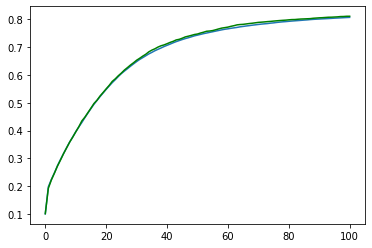

In [24]:
from matplotlib.pyplot import plot

# plot history and see poor generalization
plot(list(range(len(acc_history))), acc_history, '-')
plot(list(range(len(test_history))), test_history, 'g-')